### To start learning how to use Keras. 
This is based on the Keras tutorials

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot



%matplotlib inline
model = Sequential()

Using TensorFlow backend.


In [2]:
# stack layers
model.add(Dense(output_dim = 64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))

In [3]:
# compile the model with the complie
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', 
             momentum = 0.9, nesterov = True)

### Getting started with the Keras Sequential model
Look [here.](https://keras.io/getting-started/sequential-model-guide/)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [5]:
# crete a list of layers and create a model
model = Sequential([
        Dense(32,input_dim=784),
        Activation('relu'),
        Dense(10),
        Activation('softmax')
    ])

In [6]:
# create a model with the add method
model= Sequential()
model.add(Dense(32, input_dim = 784))
model.add(Activation('relu'))

### Specifying input shape
The first layer of the Sequential class needs to have information about how the data will be added. The other layers infer it. 
options:

- `input_shape`: a tuple

- `batch_input_shape`: the batch dimension is included. 

- Some layers use input_dim 

In [7]:
# 3 ways to start the first layer
# A 
model= Sequential()
model.add(Dense(32, input_shape=( 784,)))

# B
model= Sequential()
model.add(Dense(32, input_shape=(None, 784))) # The model can use any batch dimension here
     
model= Sequential()
model.add(Dense(32, input_dim=784)) #not ehte input dim


### The Merge layer 
This allows two sequentials to be merged together.  We can use this to train two diffent types of models on the same data and then merge them. 

The merge can combine using multiple operations

- sum 
- concat
- mul: element wise multiplication
- dot: matrix multiplication
- cos: cosine similarity
- mode allows for arbitary tranformation

In [8]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
from keras.layers import Merge

left_branch = Sequential()
left_branch.add(Dense(32,input_dim= 784))

right_branch = Sequential()
right_branch.add(Dense(32,input_dim=784))

merged = Merge([left_branch, right_branch], mode = 'concat')

final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10,activation='softmax'))
# compile the model with rmsprop and cross_entropy
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

### Compilation: 
Sets up the learning process with the compile method.
Has three inputs:
- optimizer - such as rmsprop, adagrad
- loss function - such as categorical_cross_entropy, mse
- list of metrics, can include a list of metrics


In [9]:
# for a multi-class classification problem
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# for binary
model.compile(optimizer= 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# for regression
model.compile(optimizer = 'rmsprop',
             loss = 'mse')

### Training

In [10]:
### Training a model  This is just one layer model
model = Sequential()
model.add(Dense(1, input_dim=784, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [11]:
#set up some data
data = 20*np.random.random((10000,784))-10

def classify(x):
    return int(x.sum()>0)
    
    
#labels = np.random.randint(2,size =(1000,1))
labels = np.array([classify(x) for x in data])
# train the above model on the random data
model.fit(data,labels,nb_epoch=10, batch_size = 100)

Epoch 1/10
10000/10000 [==============================] - 0s - loss: 2.2908 - acc: 0.5603     
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 0.7362 - acc: 0.7553     
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 0.2232 - acc: 0.9034     
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 0.1367 - acc: 0.9539     
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 0.1193 - acc: 0.9617     
Epoch 6/10
10000/10000 [==============================] - 0s - loss: 0.1086 - acc: 0.9633     
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 0.1010 - acc: 0.9682     
Epoch 8/10
10000/10000 [==============================] - 0s - loss: 0.0947 - acc: 0.9712     
Epoch 9/10
10000/10000 [==============================] - 0s - loss: 0.0883 - acc: 0.9732     
Epoch 10/10
10000/10000 [==============================] - 0s - loss: 0.0846 - acc: 0.9742     


In [12]:
# For multi-input with 10 classes

# set up a  left branch
left_branch = Sequential()
left_branch.add(Dense(32, input_dim = 784))

# set up a right branch
right_branch = Sequential()
right_branch.add(Dense(32, input_dim = 784))



# create a downstream model and add the merged then a softmax layer
merged= Merge([left_branch, right_branch], mode = 'concat')
model = Sequential()
model.add(merged)
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

# generage some dummy data
from keras.utils.np_utils import to_categorical
data_1 = np.random.random((1000,784))
data_2 = np.random.random((1000,784))

# these are integers between 0 and 9
labels = np.random.randint(10, size=(1000, 1))
# we convert the labels to a binary matrix of size (1000, 10)
# for use with categorical_crossentropy
labels = to_categorical(labels, 10)

# train the model 
model.fit([data_1, data_2], labels, nb_epoch=10, batch_size = 32)



Epoch 1/10
1000/1000 [==============================] - 0s - loss: 2.9783 - acc: 0.1070     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 2.5661 - acc: 0.1380     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 2.5294 - acc: 0.1510     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 2.3343 - acc: 0.1730     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 2.2762 - acc: 0.2060     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 2.1873 - acc: 0.2380     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 2.0263 - acc: 0.2980     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 2.0220 - acc: 0.3010     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 1.8964 - acc: 0.3560     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 1.7874 - acc: 0.3670     


### My own model 
Below, I am trying to use a simple model to fit a line polynomial

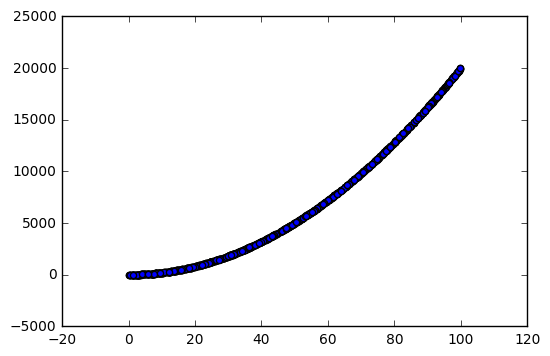

In [13]:
# generate some data
n = 1000
X_train = np.random.uniform(0,100,n)
y_train = 2.0*X_train**2 + np.random.normal(0,1,n)

X_test= np.random.uniform(0,100,n)
y_test=2.0*X_test**2 + np.random.normal(0,1,)
plt.scatter(X_train,y_train)

In [14]:
model = Sequential()
model.add(Dense(1000, input_dim=1, activation = 'sigmoid'))
model.add(Dense(10,activation = 'linear'))
model.add(Dense(1, activation = 'linear'))


model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, y_train, nb_epoch=1000, batch_size = 32, verbose = 0)

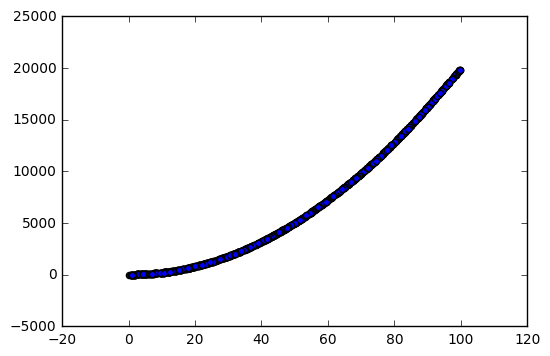

In [15]:
pred = model.predict(X_test)
plt.scatter(X_test, pred)

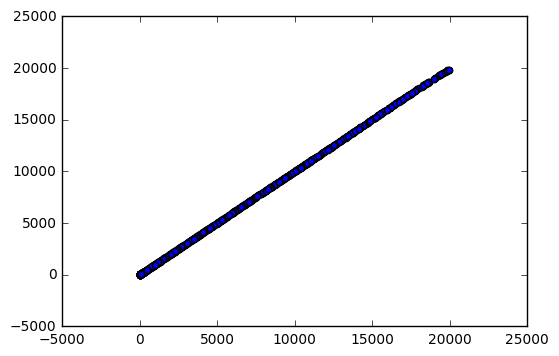

In [20]:
plt.scatter(y_test,pred)

### Examples

I am playing with some of these examples.

```python

from keras.layers import Dense, Dropout, Activation
from keras.optimizer import SGD

model = Sequential()

# add dense layer of 20 nueron
model.add(Dense(64, input_dim=20, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))

model.add(Dense(64, init = 'uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))

model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
```

### Using convolutional neural nets
This is from the tutorial at the [Keras Blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) and this [gist](https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d).

In [63]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from os import getcwd,listdir
from os.path import join,split

In [78]:
base = join(split(split(getcwd())[0])[0],'data_local','dogs_cats')
train_data_dir = join(base, 'train')
validation_data_dir = join(base, 'validation')
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch =10


# create a data generator which rotates and screws with images
train_datagen = ImageDataGenerator(rotation_range=40,
                             rescale=1./255,
                             shear_range= 0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)
                             

In [72]:
#set up dimensions of the images
img_width , img_height = 150, 150
# create the model 

model = Sequential()

# first layer is 32 neuron 2d Convolutional layer for 3x3. then Max pooling
# note we had to change the order of the input_shape for the backend tensorflow
model.add(Convolution2D(32, 3, 3, input_shape=( img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second layer is 32 neuron 2d Convolutional layer for 3x3. then Max pooling
model.add(Convolution2D(nb_filter= 32,nb_row=3,nb_col=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# another layer 
model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Now dense layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])




In [81]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(validation_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode = 'binary')


model.fit_generator(train_generator,
                   samples_per_epoch=nb_train_samples,
                    nb_epoch=nb_epoch,
                   validation_data = validation_generator,
                   nb_val_samples = nb_validation_samples)

Found 2002 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
2002/2000 [==============================] - 66s - loss: 0.6945 - acc: 0.5080 - val_loss: 0.6898 - val_acc: 0.5763
Epoch 2/10
2002/2000 [==============================] - 63s - loss: 0.6882 - acc: 0.5480 - val_loss: 0.6822 - val_acc: 0.5437
Epoch 3/10
2002/2000 [==============================] - 63s - loss: 0.6775 - acc: 0.5764 - val_loss: 0.6440 - val_acc: 0.6587
Epoch 4/10
2002/2000 [==============================] - 63s - loss: 0.6437 - acc: 0.6224 - val_loss: 0.6226 - val_acc: 0.6438
Epoch 5/10
2002/2000 [==============================] - 62s - loss: 0.6243 - acc: 0.6364 - val_loss: 0.6411 - val_acc: 0.6175
Epoch 6/10
2002/2000 [==============================] - 63s - loss: 0.6276 - acc: 0.6578 - val_loss: 0.6067 - val_acc: 0.6538
Epoch 7/10
2002/2000 [==============================] - 63s - loss: 0.6141 - acc: 0.6723 - val_loss: 0.6033 - val_acc: 0.6412
Epoch 8/10
2002/2000 [=============

In [86]:
model.save_weights(join(base,'model1.h5'))

In [82]:
base

'/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/dogs_cats'

#### Script for using the VGG16
This is the standard script for just using VGG16. 

In [137]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np

def VGG_16(weights_path= None):
    """This implements the VGG_16 convolutional network for images. 
    Its been very slightly modified for using the TensorFlow Backend
    """
    model = Sequential()
    
    #Convolutional block 1 with 64 output filters
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    
    # Convolutional block 2 with 128 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    # Convolutional block 3 with 256 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    
    # Convolutional block 3 with 512 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Convolutional block 3 with 512 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Fully Connected classifier
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    
    if weights_path is None: 
        weights_path = '/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/vgg16_weights.h5'

    #if weights_path:
    #    model.load_weights(weights_path)
    return model


    
model = VGG_16()   

### Using VGG16 for transfer learning. 
In this I am following the tutorial to do transfer learning.

In [193]:
import os 
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# path to the model weights file

weights_path = join(split(base)[0],'vgg16_weights.h5')
top_model_weights_path = join(base, 'bottleneck_fc_model.h5')

# dimensions of the imates
img_width , img_height = 150, 150

train_data_dir = join(base,'train')
validation_data_dir = join('validation')
nb_train_samples = 2000
nb_validation_sampeles = 800
nb_epoch = 50

def load_VGG16_covolutional_layers():
    
    
    model = Sequential()
    # build the VGG16 network 
    #Convolutional block 1 with 64 output filters
    model.add(ZeroPadding2D((1,1),input_shape=(img_width,img_height,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    
    # Convolutional block 2 with 128 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    # Convolutional block 3 with 256 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    
    # Convolutional block 3 with 512 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Convolutional block 3 with 512 output filters
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    # load the weights of the VGG16 networks
    # (trained on ImageNet, won the ILSVRC competition in 2014)
    # note: when there is a complete match between your model definition
    # and your weight savefile, you can simply call model.load_weights(filename)
    assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
    f = h5py.File(weights_path)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    f.close()
    return model
    


In [ ]:
model = load_VGG16_covolutional_layers()

datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
bottleneck_features_train = model.predict_generator(generator, nb_train_samples)
np.save(open(join(base,'bottleneck_features_train.npy'), 'w'), bottleneck_features_train)

generator = datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)

np.save(open(join(base,'bottleneck_features_validation.npy'), 'w'), bottleneck_features_validation)

In [243]:
def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1./255)

    model = load_VGG16_covolutional_layers()
    generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples)
    np.save(open(join(base,'bottleneck_features_train.npy'), 'w'), bottleneck_features_train)

    generator = datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)
    np.save(open(join(base,'bottleneck_features_validation.npy'), 'w'), bottleneck_features_validation)

In [252]:
generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)

Found 2002 images belonging to 2 classes.


In [249]:
image = generator.next()

In [ ]:
len(res)

In [ ]:
res